## Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Question 1.1 Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

    #### Answer:
    #### 1.1: The average order value can often be a useful metric to evaluate the data. However, the presence of outliers can skew the AOV and greatly reduce the usefulness of this metric.This is what is happening in the data here. Two main issues stand out:
    a) Less than 1% (0.33% to be specific) of total orders come from a single user that buys 2000 sneakers every few days, compared to other users that average around 2 pairs of sneakers per order.The orders are placed at exactly 4 o’clock so it seems that it is an automated purchase. 
    b) Shop number 78 sells a single sneaker for $154,350. This amount per sneaker is about 1000 times greater than the average cost of a sneaker in the other shops. 

    In order to address these issues, the first step is to evaluate the legitimacy of these outliers and understand the reason for obtaining an AOV. Let's assume that these outliers are legitimate purchases, and an AOV is being asked for to gain an understanding of the current market for the sneakers. In that case, the AOV of the total data gives no useful information on the majority of orders. Thus, the most straightforward way to evaluate the data is to separate the dataset into these three different groups - the majority or orders, the shop with an extraordinarily high AOV, and the user with an extraordinarily high order amount. 

    Another way to address these issues is to look at the median of the order value, instead of the average. This is because the median is robust to outliers. However, in choosing to use the median, we lose information that may be relevant about the multiple groups that make up the customers in the data set.   

    (Please expand the following sub-section, "Exploration of data" for further insight into my thought process and explanation of the above answers)

#### Exploration of data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data
orders = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
# quick look at data
orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# check data types

orders.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [5]:
# convert created_at to datetime

orders.created_at = pd.to_datetime(orders.created_at)

In [11]:
# check to see if there are missing values in any columns

orders.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [7]:
# summary statistics of each column

orders.describe() 

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [9]:
# check date range for created_at

orders.created_at.describe(datetime_is_numeric=True)

count                             5000
mean     2017-03-15 22:20:37.076199936
min                2017-03-01 00:08:09
25%      2017-03-08 07:08:03.750000128
50%         2017-03-16 00:21:20.500000
75%      2017-03-23 10:39:58.249999872
max                2017-03-30 23:55:35
Name: created_at, dtype: object

    #### The top 75% of order amounts range from $90 to $390 with 1-3 sneakers per order, but the maximum order amount is 704,000, with 2000 sneakers for the order. This is suspicious. Explore the distribution to get more insight into why.




array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'shop_id'}>],
       [<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'order_amount'}>],
       [<AxesSubplot:title={'center':'total_items'}>,
        <AxesSubplot:title={'center':'created_at'}>]], dtype=object)

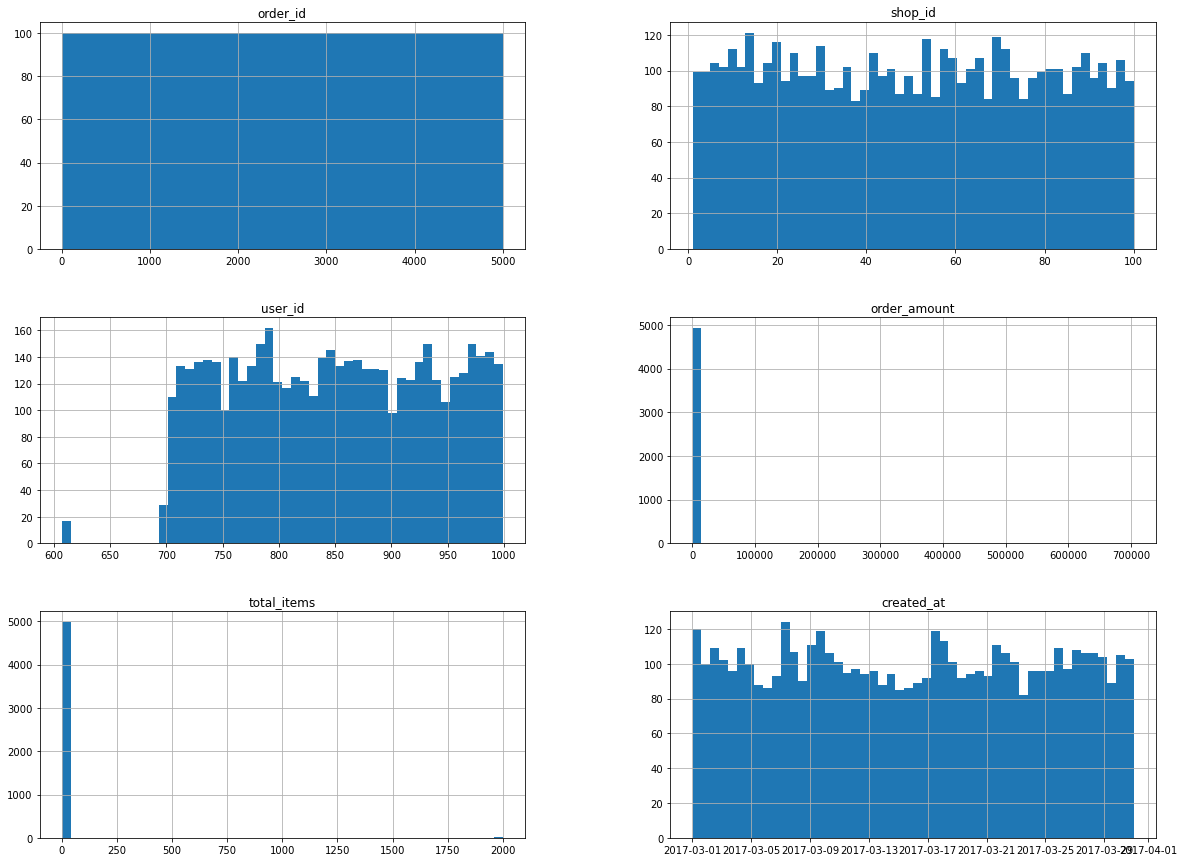

In [12]:
# Plot histograms of each column in the dataframe

orders.hist(bins=50, figsize=(20,15))

In [29]:
# Explore orders above the 75% quantile

orders[['total_items', 'order_amount']].loc[orders.total_items > 3].describe()

,total_items,order_amount
count,397.000000,397.000000
mean,89.720403,31402.181360
std,404.555030,142741.610268
min,4.000000,360.000000
25%,4.000000,536.000000
50%,4.000000,632.000000
75%,5.000000,712.000000
max,2000.000000,704000.000000


In [28]:
# Explore orders below max amount

orders[['total_items', 'order_amount']].loc[orders.total_items < 2000].describe()

,total_items,order_amount
count,4983.00000,4983.000000
mean,1.99398,754.091913
std,0.98318,5314.092293
min,1.00000,90.000000
25%,1.00000,163.000000
50%,2.00000,284.000000
75%,3.00000,390.000000
max,8.00000,154350.000000


In [34]:
# calculate percentage of total orders that are 2000 sneakers/order 

((5000-4983)/5000) * 100

0.33999999999999997

In [35]:
# Value per sneaker if 8 cost 154,350

154350/8

19293.75

    Insights Gleaned from exploration thus far:
    
    #### Most orders are between 0-8 sneakers per order. Less than 1% of orders consist of exactly 2000 sneakers per order. Explore this distribution to get more insight into why.
    #### The average order value is between $90 and $390. The max order value even after ignoring the orders with 2000 sneakers is 154,350. In other words, people are paying 154,350 for a single order of 8 sneakers (19,293.75 per sneaker!) This is also suspect, and must be explored. 

    Let's first look at the order amounts of 2000 sneakers.

In [42]:
# Look at orders of 2000 sneakers

orders.loc[orders.total_items == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


    #### All orders were placed at the same shop, by the same user at the same time on different dates. Could be a warehouse purchase? Let's see if the shop sells to other users, and whether the user buys from multiple shops.

In [43]:
orders.loc[orders.shop_id == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


In [44]:
orders.loc[orders.user_id == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


    #### Let's now look at the second issue, the extraordinarily high price per sneaker


In [45]:
# For a cleaner code, make a second df without the orders of 2000 sneakers for exploration

orders_truncated = orders.loc[orders.total_items != 2000]

In [46]:
orders_truncated.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


In [57]:
# explore order amounts greater than $390
orders_truncated['order_amount'].loc[orders_truncated.order_amount > 390].describe()

count      1230.000000
mean       2351.809756
std       10538.510022
min         392.000000
25%         459.000000
50%         504.000000
75%         588.000000
max      154350.000000
Name: order_amount, dtype: float64

In [62]:
# Let's look at a reasonable but relatively high order amount

orders_truncated['order_amount'].loc[orders_truncated.order_amount > 2000].describe()

count        46.000000
mean      49213.043478
std       26472.227449
min       25725.000000
25%       25725.000000
50%       51450.000000
75%       51450.000000
max      154350.000000
Name: order_amount, dtype: float64

<AxesSubplot:>

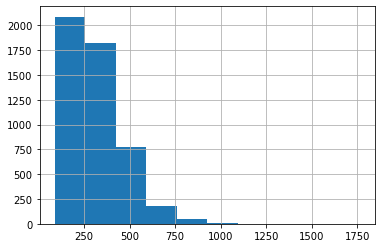

In [64]:
# Orders less than $2000
orders_truncated['order_amount'].loc[orders_truncated.order_amount < 2000].hist()

    #### The order amounts less than 2000 show a reasonable distribution. The order amounts greater than 2000 show a very high distribution. Let's explore these 46 orders

In [66]:
orders_truncated.loc[orders_truncated.order_amount > 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20


    #### The same store has a sneaker that is sold for $154,350. Either these sneakers are gold plated, this is a data entry error, or something more sinister is going on.

### Question 1.2: What metric would you report for this dataset?

    #### Answer:
    #### 1.2: I would report the median order value, and the interquartile range. However, I would also give the option to look at the average order value of the three different groups detected in the above exploration. 

### Question 1.3: What is its value?

    #### Depending on the situtaion and the audience, I would report either a short answer, or a long answe as follows:

    Short answer: The median order value is $284, with the middle 50% of the orders being between $163 and $390. However, extreme outliers with very high order amounts or order values are present in the data.

    Long answer: The median order value is $284, with the middle 50% of the orders being between $163 and $390. However, extreme outliers are present in the data. These outliers come from two sources: 1) A shop that sells a single sneaker for $154,350 (AOV = $49,213, SD = 26,472). 2) A user that buys 2000 sneakers every few days (AOV: $704,000, SD = 0).
    The AOV excluding this 1.26% of orders that clearly define a different population is $302.58 (SD = 160.80). The median is similar to the median when outliers are included (median = 302.58)
    

#### Code to obtain above values 
(Some of this is repetitive from the exploration above for the sake of clarity, and ease of readability)

In [68]:
orders.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [72]:
# Make a dataframes for the user 607 that buys 2000 sneakers
df_high_sales = orders.loc[orders.total_items == 2000]

In [74]:
df_high_sales.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,17.000000,17.0,17.0,17.0,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0
std,1603.584872,0.0,0.0,0.0,0.0
min,16.000000,42.0,607.0,704000.0,2000.0
25%,1363.000000,42.0,607.0,704000.0,2000.0
50%,2154.000000,42.0,607.0,704000.0,2000.0
75%,3333.000000,42.0,607.0,704000.0,2000.0
max,4883.000000,42.0,607.0,704000.0,2000.0


In [75]:
# Make a dataframes for high order amounts from shop 78
df_high_price = orders.loc[orders.shop_id == 78]

In [76]:
df_high_price.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.000000,46.0,46.000000,46.000000,46.000000
mean,2663.021739,78.0,867.739130,49213.043478,1.913043
std,1338.520020,0.0,81.314871,26472.227449,1.029047
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1428.250000,78.0,812.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3720.250000,78.0,935.750000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,154350.000000,6.000000


In [90]:
# dataframe without orders from shop 78 or order amounts equal to 2000
orders_wout_78 = orders.loc[orders.shop_id != 78]
orders_wout_outliers = orders_wout_78.loc[orders_wout_78.total_items != 2000]

In [92]:
# calculate median and AOV for the dataframe without outliers
orders_wout_outliers.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [93]:
# calculate percentage of data removed from the original dataframe
((len(orders) - len(orders_wout_outliers))/len(orders)) * 100

1.26

## Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### 2.1: How many orders were shipped by Speedy Express in total?

    #### Answer:
    #### 2.1: There were 54 orders shipped by Speedy Express.

    Code is as follows:
```
SELECT COUNT (*)
	FROM Orders JOIN Shippers 
    ON Shippers.ShipperID = Orders.ShipperID
    WHERE Shippers.ShipperName = 'Speedy Express';
```



### 2.2 What is the last name of the employee with the most orders?

    #### Answer:
    #### 2.2: The last name of the employee with the most orders is 'Peacock' - They had 40 orders.

    Code is as follows:
```
SELECT Employees.LastName, COUNT (Orders.EmployeeID) AS most_common
	FROM Orders
    JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
    GROUP BY Orders.EmployeeID
    ORDER BY most_common DESC
    LIMIT 1;
```

### 2.3: What product was ordered the most by customers in Germany?

    #### Answer:
    #### 2.3: The product that was ordered the most in terms of the highest quantity by customers in Germany was 'Boston Crab Meat'- the quantity was 160. 
              The product that was ordered the most in terms of frequency was Gorgonzola Telino, which was ordered 5 times

    Code is as follows for most orders by quantity:
```
SELECT Products.ProductName, COUNT(Orders.OrderID), SUM(OrderDetails.quantity) AS most_orders
    FROM Orders
    JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
    JOIN Products ON OrderDetails.ProductID = Products.ProductID
    JOIN Customers ON Orders.CustomerID = Customers.CustomerID
    WHERE Customers.Country = 'Germany'
    GROUP BY Products.ProductName
    ORDER BY most_orders DESC
    LIMIT 1;
```
    Code is as follows for most orders by frequency:

```
SELECT Products.ProductName, COUNT(Orders.OrderID) AS most_frequent
    FROM Orders
    JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
    JOIN Products ON OrderDetails.ProductID = Products.ProductID
    JOIN Customers ON Orders.CustomerID = Customers.CustomerID
    WHERE Customers.Country = 'Germany'
    GROUP BY Products.ProductName
    ORDER BY most_frequent DESC
    LIMIT 1;
```